In [1]:
import countingworkspace
from countingworkspace import create_workspace, create_variables
import countingworkspace.utils
import ROOT
import numpy as np

countingworkspace.utils.silence_roofit()

Welcome to JupyROOT 6.18/00


Consider the simple case where we are able to completely decouple the categories

$$
n_{1} \sim Pois[\lambda_1] \\
n_{2} \sim Pois[\lambda_2]
$$

The likelihood will be:

$$Pois[n_{1}| \lambda_1]\times Pois[n_{2} | \lambda_2]$$

And the maximum likelihood estimator are $\hat \lambda_{1,2} = n_{1,2}$. Two times the negative log likelihood can be writen as

$$
\frac{\lambda_1^{n_1}}{n_1!} e^{-\lambda_1} + \left(1 \leftrightarrow 2\right)
$$

The Hessian is:

$$
H = \left(\matrix{2n_1/\lambda_1^2 & 0 \\ 0 & 2n_2/\lambda_2^2}\right)
$$

evaluated at the expected value ($n_1=\lambda_1, n_2=\lambda_2$):

$$
H = \left(\matrix{2/\lambda_1 & 0 \\ 0 & 2/\lambda_2}\right)
$$

The covariance matrix
$$
\text{Cov}(\hat\lambda_1, \hat\lambda_2) = \frac{1}{2}H^{-1} = \left(\matrix{\lambda_1 & 0 \\ 0 & \lambda_2}\right)
$$

In [17]:
NCATEGORIES = 2
NPROCESS = 2
EXPECTED_BKG_CAT = [0, 0]
EFFICIENCIES = [[1, 0],
                [0, 1]]
NSIGNALGEN = [100, 100]

In [18]:
ws = create_workspace(NCATEGORIES, NPROCESS,
                      efficiencies=EFFICIENCIES,
                      nexpected_bkg_cat=EXPECTED_BKG_CAT,
                      nsignal_gen = NSIGNALGEN)

pdf = ws.obj('ModelConfig').GetPdf()
obs = ws.obj('ModelConfig').GetObservables()

INFO:root:adding observables for 2 categories
INFO:root:adding efficiencies for 2 categories and 2 processes
INFO:root:adding expected events for 2 categories and 2 processes


In [19]:
data_asimov = ROOT.RooStats.AsymptoticCalculator.GenerateAsimovData(pdf, obs)
data_asimov.Print('V')

DataStore CountingAsimovData0 (CountingAsimovData0)
  Contains 1 entries
  Observables: 
    1)  nobs_cat0 = 100  L(0 - 100000)  "nobs_cat0"
    2)  nobs_cat1 = 100  L(0 - 100000)  "nobs_cat1"


In [60]:
fr = pdf.fitTo(data_asimov, ROOT.RooFit.Save(), ROOT.RooFit.PrintLevel(-1))
fr.Print()


  RooFitResult: minimized FCN value: 6.44471, estimated distance to minimum: 4.81266e-17
                covariance matrix quality: Full, accurate covariance matrix
                Status : MINIMIZE=0 HESSE=0 

    Floating Parameter    FinalValue +/-  Error   
  --------------------  --------------------------
     nsignal_gen_proc0    1.0000e+02 +/-  1.00e+01
     nsignal_gen_proc1    1.0000e+02 +/-  1.00e+01



Warning in <TCanvas::Constructor>: Deleting canvas with same name: 


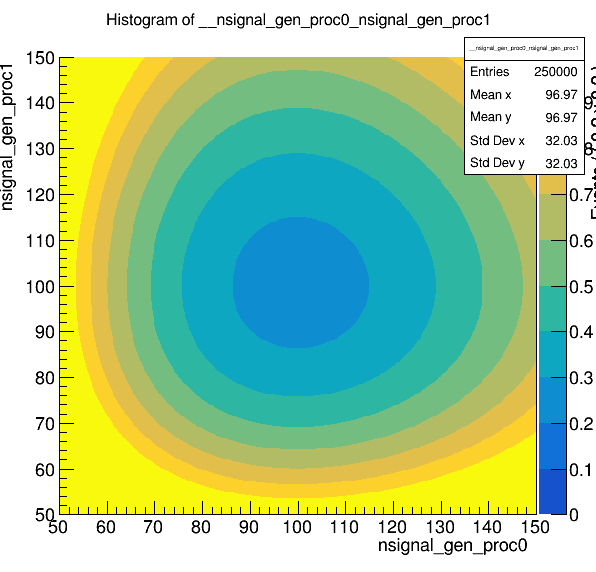

In [56]:
nll = pdf.createNLL(data_asimov)
h = ws.var('nsignal_gen_proc0').createHistogram('', ROOT.RooFit.Binning(500, 50, 150),
                                 ROOT.RooFit.YVar(ws.var('nsignal_gen_proc1'), ROOT.RooFit.Binning(500, 50, 150)))
nll.fillHistogram(h, ROOT.RooArgList(ws.var('nsignal_gen_proc0'), ws.var('nsignal_gen_proc1')))

canvas = ROOT.TCanvas("", "", 600, 600)
h.Draw('colz')
h.GetZaxis().SetRangeUser(0, 1)
h.SetContour(10)
canvas.Draw()

## Full Mixing

In [78]:
EFFICIENCIES = [[0.5, 0.5],
                [0.5, 0.5]]
ws = create_workspace(NCATEGORIES, NPROCESS,
                      efficiencies=EFFICIENCIES,
                      nexpected_bkg_cat=EXPECTED_BKG_CAT,
                      nsignal_gen = NSIGNALGEN)

pdf = ws.obj('ModelConfig').GetPdf()
obs = ws.obj('ModelConfig').GetObservables()

data_asimov = ROOT.RooStats.AsymptoticCalculator.GenerateAsimovData(pdf, obs)
data_asimov.Print('V')

INFO:root:adding observables for 2 categories
INFO:root:adding efficiencies for 2 categories and 2 processes
INFO:root:adding expected events for 2 categories and 2 processes


DataStore CountingAsimovData0 (CountingAsimovData0)
  Contains 1 entries
  Observables: 
    1)  nobs_cat0 = 100  L(0 - 100000)  "nobs_cat0"
    2)  nobs_cat1 = 100  L(0 - 100000)  "nobs_cat1"


In [80]:
fr = pdf.fitTo(data_asimov, ROOT.RooFit.Save(), ROOT.RooFit.PrintLevel(-1))
fr.Print()


  RooFitResult: minimized FCN value: 6.44471, estimated distance to minimum: 4.28847e-18
                covariance matrix quality: Full, accurate covariance matrix
                Status : MINIMIZE=0 HESSE=0 

    Floating Parameter    FinalValue +/-  Error   
  --------------------  --------------------------
     nsignal_gen_proc0    1.0000e+02 +/-  1.71e+03
     nsignal_gen_proc1    1.0000e+02 +/-  1.71e+03



Warning in <TROOT::Append>: Replacing existing TH1: __nsignal_gen_proc0_nsignal_gen_proc1 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: 


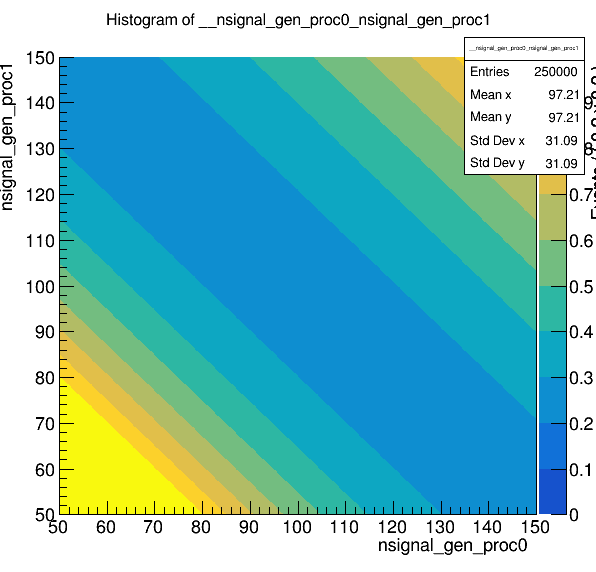

In [63]:
nll = pdf.createNLL(data_asimov)
h = ws.var('nsignal_gen_proc0').createHistogram('', ROOT.RooFit.Binning(500, 50, 150),
                                 ROOT.RooFit.YVar(ws.var('nsignal_gen_proc1'), ROOT.RooFit.Binning(500, 50, 150)))
nll.fillHistogram(h, ROOT.RooArgList(ws.var('nsignal_gen_proc0'), ws.var('nsignal_gen_proc1')))

canvas = ROOT.TCanvas("", "", 600, 600)
h.Draw('colz')
h.GetZaxis().SetRangeUser(0, 1)
h.SetContour(10)
canvas.Draw()

## Full mixing reparametrized

In [70]:
ws = ROOT.RooWorkspace()
ws.factory('s[200, 0, 100000]')
ws.factory('d[0, -1000, 1000]')
ws.factory('expr:nsignal_gen_proc0("0.5 * (@0 + @1)", s, d)')
ws.factory('expr:nsignal_gen_proc1("0.5 * (@0 - @1)", s, d)')

ws = create_workspace(NCATEGORIES, NPROCESS,
                      efficiencies=EFFICIENCIES,
                      nexpected_bkg_cat=EXPECTED_BKG_CAT,
                      expression_nsignal_gen='nsignal_gen_proc{proc}',
                      ws=ws)

pdf = ws.obj('ModelConfig').GetPdf()
obs = ws.obj('ModelConfig').GetObservables()

data_asimov = ROOT.RooStats.AsymptoticCalculator.GenerateAsimovData(pdf, obs)
data_asimov.Print('V')

INFO:root:adding observables for 2 categories
INFO:root:adding efficiencies for 2 categories and 2 processes
INFO:root:adding expected events for 2 categories and 2 processes


DataStore CountingAsimovData0 (CountingAsimovData0)
  Contains 1 entries
  Observables: 
    1)  nobs_cat0 = 100  L(0 - 100000)  "nobs_cat0"
    2)  nobs_cat1 = 100  L(0 - 100000)  "nobs_cat1"


In [75]:
fr = pdf.fitTo(data_asimov, ROOT.RooFit.Save(), ROOT.RooFit.PrintLevel(-1))
fr.Print()


  RooFitResult: minimized FCN value: 6.44471, estimated distance to minimum: 4.15282e-16
                covariance matrix quality: Full, accurate covariance matrix
                Status : MINIMIZE=0 HESSE=0 

    Floating Parameter    FinalValue +/-  Error   
  --------------------  --------------------------
                     d    0.0000e+00 +/-  1.19e+03
                     s    2.0000e+02 +/-  1.41e+01



Warning in <TROOT::Append>: Replacing existing TH1: __s_d (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: 


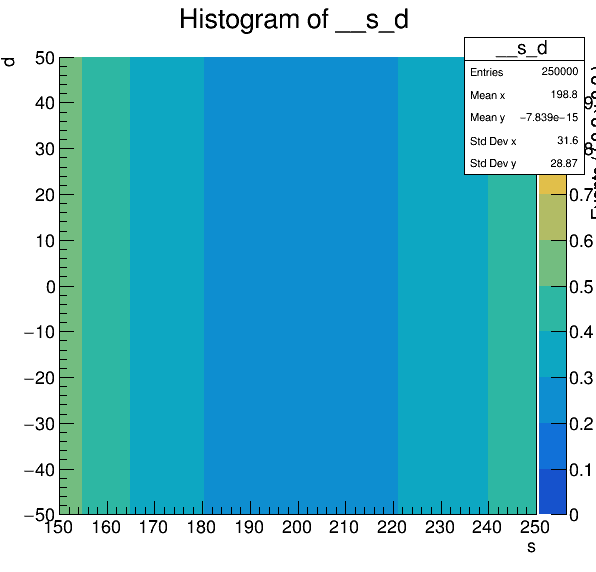

In [73]:
nll = pdf.createNLL(data_asimov)
h = ws.var('s').createHistogram('', ROOT.RooFit.Binning(500, 150, 250),
                                 ROOT.RooFit.YVar(ws.var('d'), ROOT.RooFit.Binning(500, -50, 50)))
nll.fillHistogram(h, ROOT.RooArgList(ws.var('s'), ws.var('d')))

canvas = ROOT.TCanvas("", "", 600, 600)
h.Draw('colz')
h.GetZaxis().SetRangeUser(0, 1)
h.SetContour(10)
canvas.Draw()